In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
%matplotlib inline

## Функция для визуализации дерева

In [19]:
import IPython.display
from sklearn.tree import export_graphviz
import subprocess

def draw_decision_tree(model, file_name, feature_names=None):
    export_graphviz(model, out_file=file_name + '.dot', feature_names=feature_names)
    print('Create file ' + file_name + '.dot')

    PIPE = subprocess.PIPE
    p = subprocess.Popen('dot -Tpng ' + file_name + '.dot -o ' + file_name + '.png', shell=True, 
                         stdin=PIPE, stdout=PIPE, stderr=subprocess.STDOUT, close_fds=True)
    print(p.stdout.read())
    print('Create file ' + file_name + '.png')

    image = IPython.display.Image(file_name + '.png')
    IPython.display.display(image)

# Красное вино

## Скачаем данные

In [2]:
data = np.loadtxt("winequality-red.csv", delimiter=';', skiprows=1)

In [3]:
print(data)

[[  7.4     0.7     0.    ...,   0.56    9.4     5.   ]
 [  7.8     0.88    0.    ...,   0.68    9.8     5.   ]
 [  7.8     0.76    0.04  ...,   0.65    9.8     5.   ]
 ..., 
 [  6.3     0.51    0.13  ...,   0.75   11.      6.   ]
 [  5.9     0.645   0.12  ...,   0.71   10.2     5.   ]
 [  6.      0.31    0.47  ...,   0.66   11.      6.   ]]


In [7]:
x_train = np.empty([0, 11])
y_train = np.empty([0])
for line in data:
    x_train = np.vstack([x_train, line[:11]])
    y_train = np.append(y_train, line[11])

In [8]:
print(x_train)

[[  7.4     0.7     0.    ...,   3.51    0.56    9.4  ]
 [  7.8     0.88    0.    ...,   3.2     0.68    9.8  ]
 [  7.8     0.76    0.04  ...,   3.26    0.65    9.8  ]
 ..., 
 [  6.3     0.51    0.13  ...,   3.42    0.75   11.   ]
 [  5.9     0.645   0.12  ...,   3.57    0.71   10.2  ]
 [  6.      0.31    0.47  ...,   3.39    0.66   11.   ]]


In [9]:
print(y_train)

[ 5.  5.  5. ...,  6.  5.  6.]


In [10]:
y_train = y_train >= 6

In [11]:
print(y_train)

[False False False ...,  True False  True]


## Обучим решающее дерево с максимальной глубиной 2

In [18]:
model = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)

Create file DecisionTreeClassifier_1.dot
b''
Create file DecisionTreeClassifier_1.png


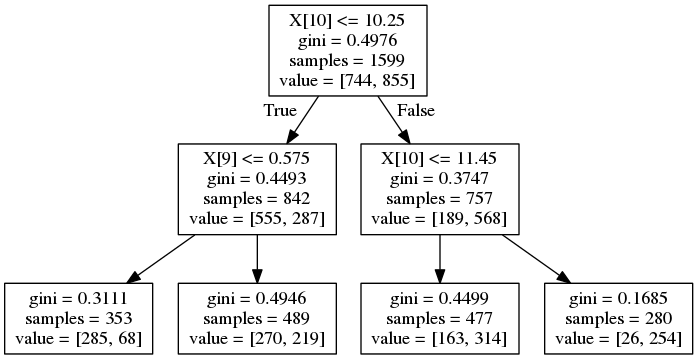

In [21]:
draw_decision_tree(model, 'DecisionTreeClassifier_1')

## Найдем лучшее решающее дерево среди деревьев глубины от 2 до 6

In [30]:
params = {'max_depth': list(range(2, 7))}
grid_searcher = GridSearchCV(DecisionTreeClassifier(), params, cv=30)
grid_searcher.fit(x_train, y_train)

GridSearchCV(cv=30, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [31]:
print(grid_searcher.best_params_)
print(grid_searcher.best_score_)

{'max_depth': 5}
0.710444027517


Create file DecisionTreeClassifier.dot
b''
Create file DecisionTreeClassifier.png


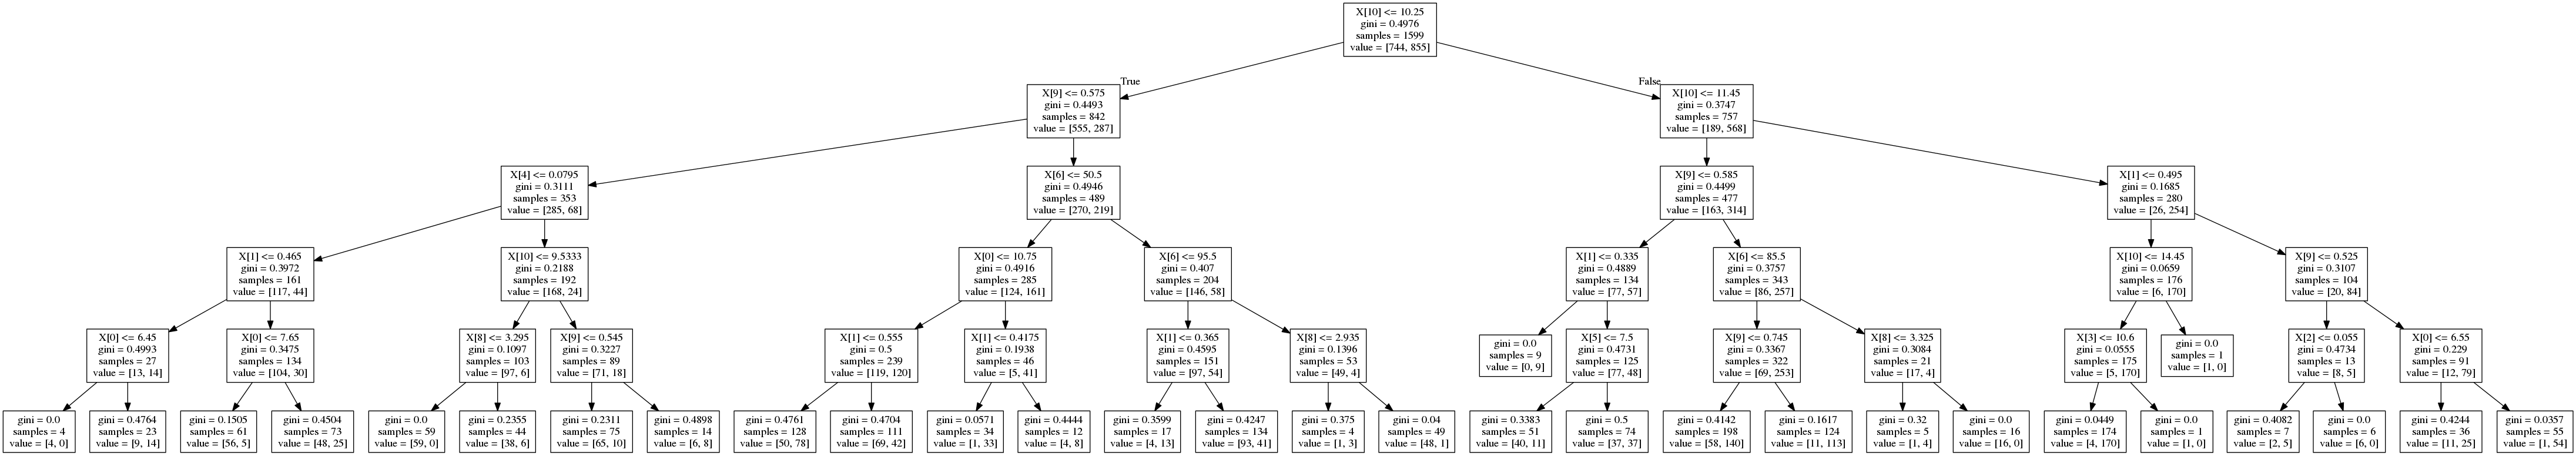

In [32]:
draw_decision_tree(grid_searcher.best_estimator_, 'DecisionTreeClassifier')

В качестве лучшего найдено решающее дерево глубины 5, которое дает результат 71%.

# Белое вино

## Скачаем данные

In [33]:
data = np.loadtxt("winequality-white.csv", delimiter=';', skiprows=1)

In [34]:
print(data)

[[  7.     0.27   0.36 ...,   0.45   8.8    6.  ]
 [  6.3    0.3    0.34 ...,   0.49   9.5    6.  ]
 [  8.1    0.28   0.4  ...,   0.44  10.1    6.  ]
 ..., 
 [  6.5    0.24   0.19 ...,   0.46   9.4    6.  ]
 [  5.5    0.29   0.3  ...,   0.38  12.8    7.  ]
 [  6.     0.21   0.38 ...,   0.32  11.8    6.  ]]


In [35]:
x_train = np.empty([0, 11])
y_train = np.empty([0])
for line in data:
    x_train = np.vstack([x_train, line[:11]])
    y_train = np.append(y_train, line[11])

In [36]:
print(x_train)

[[  7.     0.27   0.36 ...,   3.     0.45   8.8 ]
 [  6.3    0.3    0.34 ...,   3.3    0.49   9.5 ]
 [  8.1    0.28   0.4  ...,   3.26   0.44  10.1 ]
 ..., 
 [  6.5    0.24   0.19 ...,   2.99   0.46   9.4 ]
 [  5.5    0.29   0.3  ...,   3.34   0.38  12.8 ]
 [  6.     0.21   0.38 ...,   3.26   0.32  11.8 ]]


In [37]:
print(y_train)

[ 6.  6.  6. ...,  6.  7.  6.]


In [38]:
y_train = y_train >= 6

In [39]:
print(y_train)

[ True  True  True ...,  True  True  True]


## Обучим решающее дерево с максимальной глубиной 2

In [40]:
model = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)

Create file DecisionTreeClassifier_1.dot
b''
Create file DecisionTreeClassifier_1.png


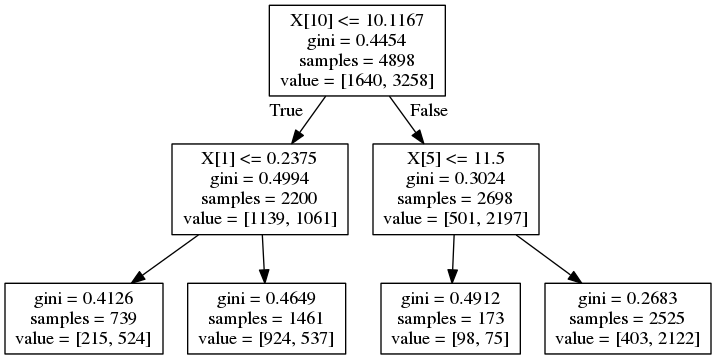

In [41]:
draw_decision_tree(model, 'DecisionTreeClassifier_1')

## Найдем лучшее решающее дерево среди деревьев глубины от 2 до 6

In [42]:
params = {'max_depth': list(range(2, 7))}
grid_searcher = GridSearchCV(DecisionTreeClassifier(), params, cv=30)
grid_searcher.fit(x_train, y_train)

GridSearchCV(cv=30, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [43]:
print(grid_searcher.best_params_)
print(grid_searcher.best_score_)

{'max_depth': 6}
0.749489587587


Create file DecisionTreeClassifier.dot
b''
Create file DecisionTreeClassifier.png


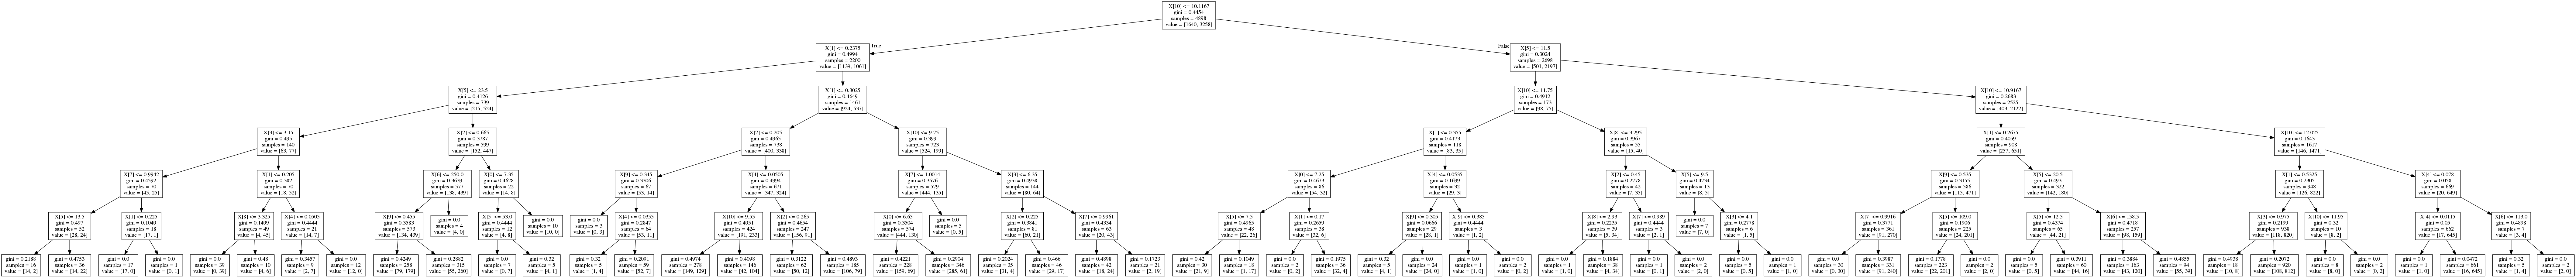

In [44]:
draw_decision_tree(grid_searcher.best_estimator_, 'DecisionTreeClassifier')

В качестве лучшего найдено решающее дерево глубины 6, которое дает результат 75%.